# Programming Project November 2019


## by Claire Nolan (Student Number G00376464)



# 1. Introduction

Assignment:
1. create a dataset by simulating a real world phenomenon
   - must be able to be measeured
   - collect >100 data points over 4 variables
   - investigate type of variables, distributions, relationships with each other
2. Model and syntesis data using Python (numpy.random package)
   - synthesise/simulate dataset matching their properties as possible
3. Detail research and implement the simulation in this notebook

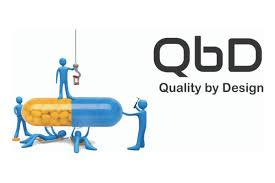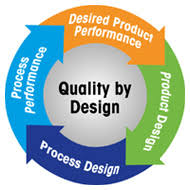

# 2. Creating a dataset by simulating a real world phenomenon

I work within the pharamceutical industry which is a heavily regulated industry. One of the key regulatory agencies is the US FDA regulatory agency. The Food and Drug Administration (FDA or USFDA) is a federal agency of the United States Department of Health and Human Services, one of the United States federal executive departments. The FDA is responsible for protecting and promoting public health through the control and supervision of food safety, tobacco products, dietary supplements, prescription and over-the-counter pharmaceutical drugs (medications), vaccines, biopharmaceuticals, blood transfusions, medical devices, electromagnetic radiation emitting devices (ERED), cosmetics, animal foods & feed and veterinary products. T

Another key group is the International Council for Harmonisation of Technical Requirements for Pharmaceuticals for Human Use (ICH). This is an initiative that brings together regulatory authorities and pharmaceutical industry to discuss scientific and technical aspects of pharmaceutical product development and registration. The mission of the ICH is to promote public health by achieving greater harmonisation through the development of technical Guidelines and requirements for pharmaceutical product registration.

Since 2011 the FDA have requested that any new drugs to be manufactured must have all manufacturing inputs be fully understood to ensure good quality product is manufactured. These also align with the ICH guidelines Q7,8,9 and the guidelines by the Eurpoean medicines agency (EMA). These manufacturing inputs include raw materials, temperature, manufacturing conditions, time, operating parameters etc. The is known as the design space or quality by design (QBD). The theory is if the inputs are managed and controlled within the design space then the product is of good quality. Quality is usually defined as a number of outputs which must meet certain specifications.

For this project the inputs for one particular product which I currently work with will be simulated. This particular product has five key inputs which if they all remain within the design space then the consistency result will meet the registered specifications resulting in good quality product.




# 3. The dataset

The dataset that I will be simulating is based on a dataset I am currently working on in my job. There is an issue with a the consistency result of a cream product which is outside the specification. 

Creams are semi-solid emulsions of oil and water. They are semisolid dosage forms containing more than 20% water or volatile components and typically less than 50% hydrocarbons, waxes, or polyols as vehicles for one or more drug substances dissolved or dispersed in a suitable cream base. Consistency describes the degree to which a semi-fluid or semi-solid material resists deformation by an applied force ie how the cream performs when it is applied to the skin.

For this particular cream product there are  a number of variables which have an impact on the consistency results. These are the pH of the cream, excipient A assay, excipient B viscosity, excipient C LOD and how many times the pH had to be adjusted per batch to meet specification. The required specifications for each input are shown below:

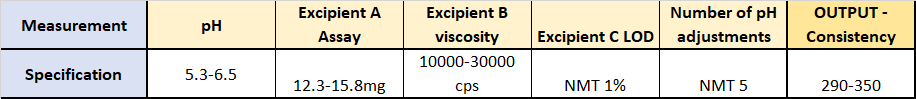

As part of the design space if the batch is manufactured within these specifiations for these parameters then the consistency result should also be in specification. 

Based on the historical data I already have collected, I know that all paramaters are normally distributed (Gaussian=distribution) except for the number of pH adjustments per batch which is a Poisson distribution.

To confirm this I will create a dataset with inputs within the specification range.

First I will import the required Python libraries. then xxx.... KNN week 6

## 3.1. Import various Python libraries into this Jupyter notebook¶

For this project I will import a number of the key libraries in Python for data analysis. These are described below:

### Numpy
For creating random data Numpy is the most imortant library. It is a general-purpose array-processing package. It provides a high-performance multidimensional array object, and tools for working with these arrays. It is the fundamental package for scientific computing with Python. It is really efficient and quick at dealing with lists and data arrays containg large amounts of numbers and working on lists within lists in multidimensional arrays. The beauty of Numpy is that it can perform operations within these arrays.

### Pandas
Pandas is used for data manipulation, analysis and cleaning. It is used for different kinds of data, such as Tabular data, ordered and unordered time series data, matrix data with row & column labels and any other statistical data sets.

### Seaborn
The Seaborn program allows for the visualisation of data. It provides high-level commands to create a variety of plot types useful for statistical data exploration and statistical model fitting.

### Matplotlib
The Matplotlib program allows for the creation of plots of data. It is the plotting library for the Python programming language. It creates 2D and 3D plots for data analysis.

In [1]:
import numpy as np #this tells the program to generate random numbers from the numpy program

In [2]:
import matplotlib.pyplot as plt #matplot is the subprogram of python for generating plots

In [3]:
import pandas as pd #Imports the Pandas program

In [4]:
import seaborn as sns #import seaborn as sns

## 3.2 Creating a random dataset

The next steps is to create datasets for each variable within the desired specifications which are normally distributed or Poisson distributed. I am choosing to have 150 data points as this represents approximately six years of batch data as approximately 25 batches are manufactured per year.

Most of the inputs must be within certain specification ranges with even more specific limits so the code for the dataset will need to be even more specific which are described below.

reference: https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html
https://www.sharpsightlabs.com/blog/numpy-random-normal/


### 3.2.1 Creating a dataset for the pH input

As per above the specification range is between 5.3-6.5 and it is desirable to have the mean result in the middle of this range. The data is normally distributed.

In [5]:
# This code is used to create a list of 150 data points between 0 and 1 to represent

x = np.random.randint(100, size=150) #ie create a list of 10 integers between 0 to 100 but not including 100.

print(x) # this tells the program to show the array


[85 30 71 94 32 93  6 15  2 74 75 20 91 20 46 77 12 88 93 42 27 35 51 40
 56 50 36 75 55 98 54 93 50 38  2 53 63 20 31 18 79 51 11  0 79 94 92 95
 50 32  5 29 87 47 53 76 88 98 57 94  1 62 57 37 11 89 43 63 92 70  1 97
 46 68 91 69  1 13 26 80 90 89 77 28 91 93 62  4 34 69 71 68 36 66  0 77
 73  7 45 14  1 91 16  6 23 74 60 15 95 38 74 67 16 37 25 93 43  0 34 90
 69 28 72 46 31 37 30 47 71 84 63 67 11 19  5 42 79 19 29 49 79 46 21 87
 23  2  1 30  6  3]


The above array is just a basic dataset. I want to now create a more representative dataset which is normally distributed within the range 5.3 to 6.5.

Below is the basic code to create normally distributed random data with mean 0 and standard deviation 0.1. This is the syntax for the code:
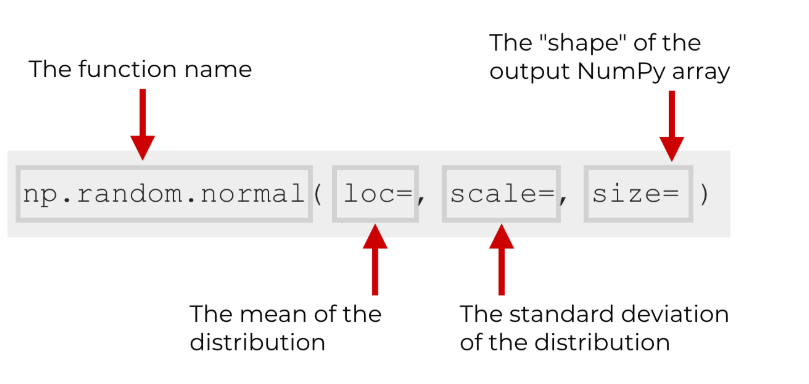
I know I want to create a dataset where the mean is in the middle of the specification range which is 5.9. I am also going to say the standard deviation is approximately 0.16 which is an educated estimate.


[5.71035425 5.93307784 6.04865403 5.67451559 5.86237167 6.18255021
 5.77902003 6.01746747 5.86753097 5.81813084 5.9366692  6.03831616
 5.83669427 5.73922437 5.88358311 5.93402396 5.84567212 5.81914159
 5.84576939 5.72117719 5.84993762 5.93331501 5.88171663 6.09809997
 5.91840205 6.1100919  5.89389643 5.81772336 5.73736343 6.12272019
 5.74268682 6.17843769 5.85569218 5.95090798 5.73292708 5.86214075
 5.77822652 5.88668645 5.81148141 6.03578725 5.84311009 5.97851555
 5.8856404  5.66787359 6.2074054  6.02533276 5.8972752  6.12824158
 5.74753815 5.81109155 5.75893692 6.17113965 5.92780323 5.76281819
 5.8996769  5.80002971 5.93279299 5.76084245 5.78084365 6.20443126
 5.99444363 5.74760733 5.68905206 5.60651214 5.92365117 5.77017824
 6.01870405 5.76456583 5.75433512 5.68092443 6.06712893 5.5792334
 6.06742075 5.90200451 5.83356525 5.8624672  6.11006914 5.89510951
 5.94845397 5.77565687 5.66193834 6.04191928 5.84490739 5.7485676
 6.08464231 5.7916056  6.02005578 5.84292681 5.92707961 5.984052

(array([ 3.,  6., 20., 31., 36., 25., 14., 10.,  4.,  1.]),
 array([5.50196107, 5.58856025, 5.67515942, 5.76175859, 5.84835777,
        5.93495694, 6.02155611, 6.10815529, 6.19475446, 6.28135364,
        6.36795281]),
 <a list of 10 Patch objects>)

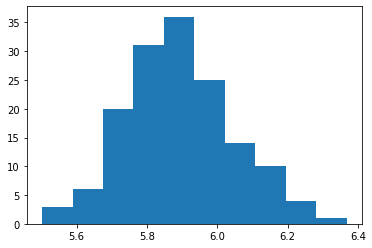

In [12]:
s = np.random.normal(5.9, 0.16, 150) # ie create a list of 100 normally distributed numbers where mean is zero and standard deviation is 0.1

print(s)

plt.hist(s) # display results as a histogram plot

[5.83116408 6.20244319 5.9809689  5.75786169 6.19440327 6.01295095
 5.89834899 5.55558101 5.82973838 5.83615735 5.71767804 5.95731274
 5.56204174 5.71783673 6.00537606 5.89329257 5.98804986 5.93195172
 5.7609727  5.84992538 6.14048508 6.12493518 5.78080646 6.13501708
 5.69812534 6.21782238 5.71524982 5.97041645 6.22753065 5.65374581
 5.81170352 6.01829178 6.03532377 5.69038088 5.84800523 5.79857898
 5.7335793  6.16747186 5.90066595 6.1128177  5.93308912 5.82088644
 5.73703673 6.21329071 5.87025338 5.99840096 5.73148406 5.83988039
 5.86804038 6.03542307 6.30018473 5.95941549 5.8374714  5.80152013
 5.86929549 6.08675683 5.97053773 6.10802835 6.00175603 6.03541414
 5.96300874 5.75539332 5.91752385 5.55229632 5.90271787 6.03179871
 6.13640025 5.84448686 6.28215942 6.03113831 5.68232285 6.09959626
 5.88733413 5.81264741 5.66020856 5.90867117 5.56431337 5.91591546
 5.89774967 5.9714352  5.83072994 5.93963742 6.07618984 6.21669335
 6.12960852 6.11836572 6.11923163 6.14804533 5.99260514 6.0518

(array([ 2.,  6.,  3., 16., 28., 30., 24., 20., 12.,  9.]),
 array([5.38669422, 5.47845913, 5.57022404, 5.66198896, 5.75375387,
        5.84551878, 5.93728369, 6.0290486 , 6.12081351, 6.21257843,
        6.30434334]),
 <a list of 10 Patch objects>)

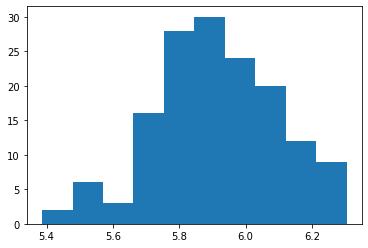

In [18]:
# this code is also similar to the code below where size is the number of required data points, loc is the mean and scale is the standard deviation

s = np.random.normal(size = 150, loc = 5.9, scale = 0.16)

print(s)

plt.hist(s) # display results as a histogram plot

LOD values skew towards 0.1% rather than middle of NMT 1%

Long Tails
Extreme values can manifest in many ways. In addition to an abundance of rare events at the edge of the distribution, you may see a long tail on the distribution in one or both directions.

In plots, this can make the distribution look like it is exponential, when in fact it might be Gaussian with an abundance of rare events in one direction.

You could use simple threshold values, perhaps based on the number of standard deviations from the mean, to identify and remove long tail values.

We can demonstrate this with a contrived example. The data sample contains 100 Gaussian random numbers with a mean of 10 and a standard deviation of 5. An additional 50 uniformly random values in the range 10-to-110 are added. This creates a long tail on the distribution.

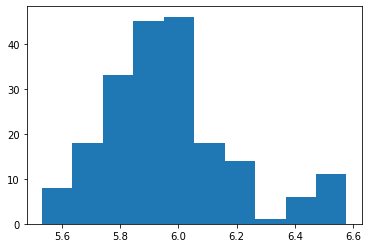

In [23]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 0.16 * randn(150) + 5.9
tail = 5.6 + (rand(50) * 1)
# add long tail
data = append(data, tail)
# histogram
pyplot.hist(data)
pyplot.show()

# ref https://machinelearningmastery.com/how-to-transform-data-to-fit-the-normal-distribution/


We can use a simple threshold, such as a value of 25, on this dataset as a cutoff and remove all observations higher than this threshold. We did choose this threshold with prior knowledge of how the data sample was contrived, but you can imagine testing different thresholds on your own dataset and evaluating their effect.

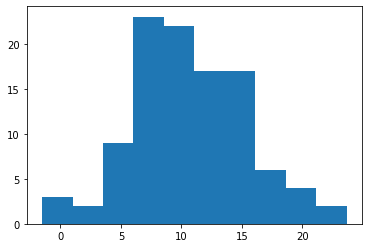

In [24]:
# histogram plot of data with a long tail
from numpy.random import seed
from numpy.random import randn
from numpy.random import rand
from numpy import append
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate a univariate data sample
data = 5 * randn(100) + 10
tail = 10 + (rand(10) * 100)
# add long tail
data = append(data, tail)
# trim values
data = [x for x in data if x < 25]
# histogram
pyplot.hist(data)
pyplot.show()

# X. References

1. https://www.fda.gov/media/71021/download - FDA guidelines for process validation
2. https://www.ich.org/page/quality-guidelines - ICH quality guidelines
3. https://www.pharmaceuticalonline.com/doc/design-space-development-how-and-when-to-get-started-0001 - a paper on the theory of design space.
4. https://en.wikipedia.org/wiki/Quality_by_Design - overview of QBD
5. https://en.wikipedia.org/wiki/Cream_(pharmaceutical) - Brief introduction to creams
6. https://wiki.anton-paar.com/en/consistency-measurement/ - explanation of the consistency measurement

# END